# The Problem
### Distributed Denial of Service (DDoS) attack vectors are one of the most powerful methods of corrupting various computer systems and applications. They can exhaust the computational resoures which can lead to service's disruption or huge financial losses by utilizing too much energy or purchased resources on some cloud platform

### For businesses that rely on cloud technologies it is crucial to have availability of their services since it can be one of the value propositions that this business has. Therefore, I would like to create a machile learning pipeline that can be used in company's Intrusion Detection System (IDS) to indicate DDoS attacks and help to mitigate them

# Machine Learning Task
### Develop a machine learning model to classify incoming network packets and identify if packets are malicious or normal

# Dataset overview
### To train the model, the CIC-IDS2017 dataset was used. The dataset of Canadian Institute of Cybersecurity contains modern attacks stored in a real-world format (PCAP). The collection of captured packets 

## $$\{(x_i,y_i)\}^N_{i=1}$$
### - $N(size\;of\;the\;collection) = 225745$ corresponds to the number of rows in the dataset
### - $x_i$ is D-dimensional feature vector (columns), where $D=78\;$(excluding the target label)
### - $y_i$ is a target label for every $x_i$

#

# Learning Algorithm Selection
### - Explainability: the model will be presented to technical audience and doesn't necessairly require explainability
### - In-memory vs out-of-memory: in the scope of this assignment, the entire dataset can be loaded into computer's RAM. Hovewer, it will be assumed that the model has to be updated incrementally to simulate the real-world scenario of using intrusion detection systems
### - The number of features and examples is more than 100k
### - The feature vector $x_i$ is mostly numerical
### - Is the data linear???
### - The training speed of the model is not a constraint
### - Prediction speed should be relatively fast

# Possible classification ML models:
### - Support Vector Machine (SVM)
### - KNeighbours Classifier
### - Gradient Boosting

# The machine learning pipeline

### Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Feature Engineering

### Data Exploration

In [2]:
ddos = pd.read_csv("./DDoS_dataset.csv")

ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

### Data Cleaning

### Here, the NaN values were filled

In [3]:
fill_value = 0.0
ddos = ddos.fillna(fill_value)

### In this computation, it was intended to show the possible correlation between $inf$ values and $y_i$
As it can be seen, there is no correlation

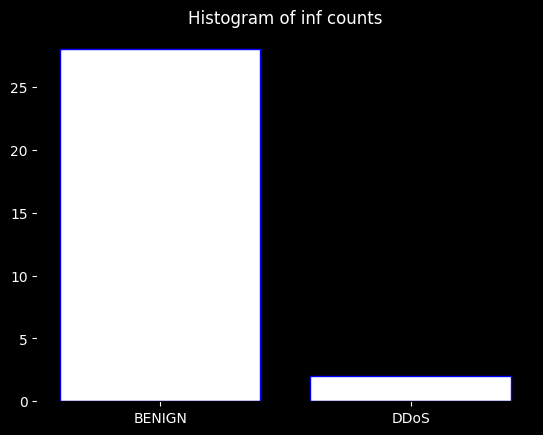

In [4]:
selected_inf = ddos[ddos["Flow Bytes/s"] == np.inf]
inf_counts = selected_inf[" Label"].value_counts()

fig = plt.figure(facecolor="black")
plt.bar(inf_counts.index, inf_counts.values, color="white", edgecolor="blue")
plt.gca().set_facecolor("black")
plt.title("Histogram of inf counts", color="white")
plt.tick_params(colors="white")
plt.show()

### In the following computation, I indicated the number of BENIGN (normal) packet captures and DDoS (malicious) packets. It was done to acknowledge if there are outliers in data or if BENIGN and DDoS are distributed unequally

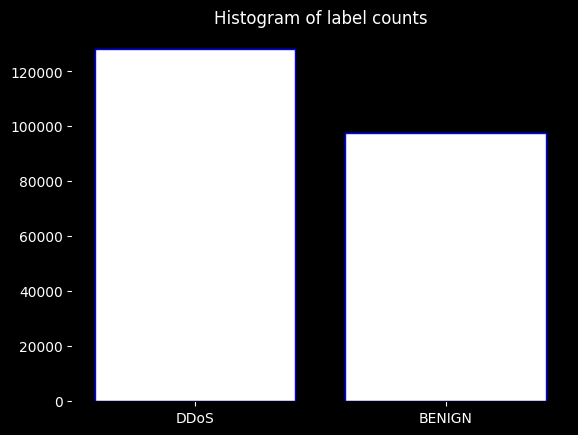

In [5]:
counts = ddos[" Label"].value_counts()

fig = plt.figure(facecolor="black")
plt.bar(counts.index, counts.values, color="white", edgecolor="blue")
plt.gca().set_facecolor("black")
plt.title("Histogram of label counts", color="white")
plt.tick_params(colors="white")
plt.show()

# Train, Validation, and Test Sets

In [ ]:
ddos = ddos.map(lambda x : 0 if x == 'BENIGN' else 1)
ddos

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

ddos_train, ddos_other = train_test_split(ddos, train_size=0.9)
ddos_validation, ddos_test = train_test_split(ddos_other, train_size=0.5)

ddos_train_X = ddos_train.drop(columns=" Label")
ddos_train_Y = ddos_train[" Label"]

ddos_validation_X = ddos_validation.drop(columns= " Label")
ddos_validation_Y = ddos_validation[" Label"]

ddos_validation_X.replace([np.inf, -np.inf], np.nan, inplace=True)
ddos_validation_X = imputer.fit_transform(ddos_validation_X)

ddos_test_X = ddos_test.drop(columns= " Label")
ddos_test_Y = ddos_test[" Label"]

ddos_test_X.replace([np.inf, -np.inf], np.nan, inplace=True)
ddos_test_X = imputer.fit_transform(ddos_test_X)

In [8]:
model = SVC(C=20, kernel="rbf")
model.fit(ddos_validation_X, ddos_validation_Y)

SVC(C=20)

In [14]:
y_pred = model.predict(ddos_test_X)